# Evolutionary Games

## Let us start with the Prisoner's dilemma first


 Calvin\Klein | Confess  | Not Confess 
 ------------ | -------  | -----------
 Confess      | 10y, 10y | 1y, 25y
 Not Confess  |  25y, 1y | 10y, 10y

### Two types of people in the population
* **defectors** (confessors) and **cooperators** (non-confessors) - assume that each is “born” into that type
* Let $x$ be the proportion of cooperators (non-confessing type) in the population
* then the proportion of defectors (confessing type) is $1-x$
* Cooperator’s expected sentence is: $3x + 25(1-x)$
* Defector’s expected sentence is: $x + 10(1-x)$
* For all $x$, defector has a better payoff: $x + 10(1-x) < 3x + 25(1-x)$, i.e. shorter sentence !
* So in the next generation, more children will be born in the defect population, than in the cooperate population
* This happens till the ***entire population becomes defectors***

In [1]:
from random import randrange
from matplotlib import pyplot as plt

In [2]:
def plot_pop(y1, y2, pop1, pop2):
  fig,ax1 = plt.subplots()
  ax2 = ax1.twinx()
  ax1.plot(y1, linestyle = 'dotted', color='r')
  ax2.plot(y2, linestyle = 'dashed', color='b')
  ax1.set_xlabel('step')
  ax1.set_ylabel(pop1, color='r')
  ax2.set_ylabel(pop2, color='b')
  plt.show()

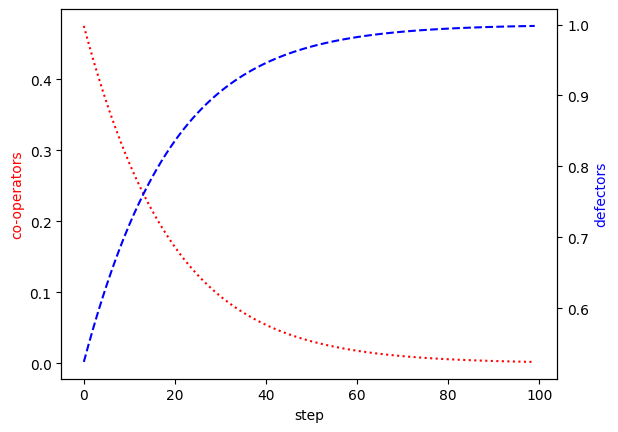

In [3]:
numSteps = 100

y1 = []
y2 = []

cp = 0.5
df = 0.5

for step in range(numSteps):

  cp_sentence = 3*cp + 25*df
  df_sentence = cp + 10*df

  cp_growth_rate = 1/cp_sentence
  df_growth_rate = 1/df_sentence

  cpn = cp*(1 + cp_growth_rate)
  dfn = df*(1 + df_growth_rate)

  cp = cpn/(cpn + dfn)
  df = 1 - cp

  y1.append(cp)
  y2.append(df)

plot_pop(y1, y2, 'co-operators', 'defectors')

## Now consider a population with three types: 

* **Never confess (N), Always defect (A) and Tit-for-tat (T)**
* Run Prisoners dilemma for two stages to construct the payoff table


 Type 1\Type 2|    A     |     T     |    N 
 ------------ | -------- | ----------| -------
      A       | 20y, 20y | 11y, 35y  | 2y, 50y 
      T       |  35y,11y |  6y,  6y  | 6y,  6y
      N       |  50y, 2y |  6y,  6y  | 6y,  6y


* N is dominated by T, so we can drop N as a strategy
* Let $x$ be the proportion of type T, and $1-x$ the proportion of type A
* Type A’s expected sentence is $20 – 9x$ and Type T’s is $35 – 29x$
* T will be better off than A if $x > 0.75$ (when more than 75% of the population is T)
* When the initial population of T is more than $75\%$, **the entire population will become T**
* But if the initial population of T is less than $75\%$, then **the entire population will become A**

* The graph below depicts this:
  * In the region to the right of the intersection point, T increases (shown by the arrow pointing to the right, i.e. increasing value of $x$)
  * In the region to the left of the intersection point, T decreases (shown by the arrow pointing to the left, i.e. decreasing value of $x$)

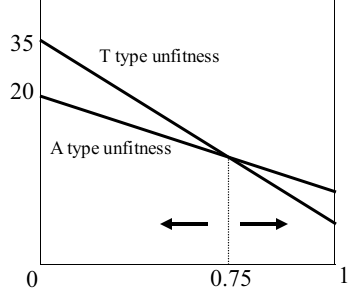

### Repeat n times

 Type 1\Type 2|    A         |     T      
 ------------ | ------------ | ----------
      A       | 10n, 10n     | 11n-9,10n+15   
      T       | 10n+15,10n-9 |  3n,3n  
    

* If the proportion of T types is $x$, then **population converts to T type** if:
  * $x(10n-9) + (1-x)10n > x3n + (1-x)(10n+15)$
  * i.e. $x > 15/(7n+6)$
* For n=2, $x > 0.75$
* As n increases, the threshold $15/(7n+6)$ falls
* For n infinite, **everyone is a T type**


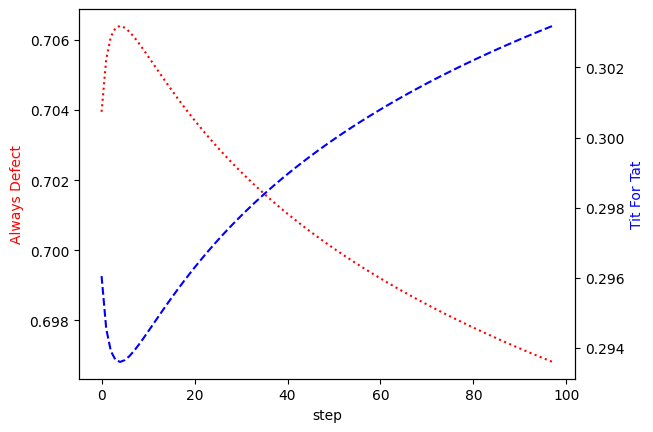

In [4]:
numSteps = 100

y1 = []
y2 = []

a = 0.7
t = 0.3

for step in range(2,numSteps):

  a_sentence = t*(10*step - 9) + a*10*step
  t_sentence = t*3*step + a*(10*step + 15)

  a_growth_rate = 1/a_sentence
  t_growth_rate = 1/t_sentence

  an = a*(1 + a_growth_rate)
  tn = t*(1 + t_growth_rate)

  a = an/(an + tn)
  t = 1 - a

  y1.append(a)
  y2.append(t)

plot_pop(y1, y2, 'Always Defect', 'Tit For Tat')

## Let us now consider Hawk-Dove game


 A\B          | Wimp   | Macho 
 ------------ | -----  | -----------
 Wimp         | 0, 0   | -1,-1
 Macho        | 1,-1   | -2,-2

* **Wimp** (always dove) and **Macho** (always hawk) - assume that each is “born” into that type
* If the initial population is all Wimps, then a Macho mutant will win (get 1) lots of times
* But if the initial population is all Machos, a Wimp mutant can get –1 which is better than what all the Machos get (-2)
* Let $x$ be the fraction of Machos
* Then being Macho is better if $1 – 3x > -x$, i.e.  $x < \frac{1}{2}$


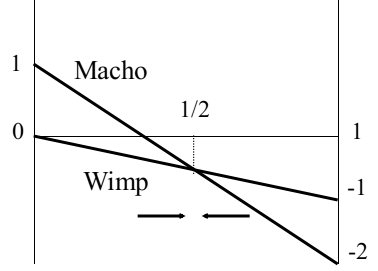

## Let us now consider the Rendezvous game

* Two people in a city want to meet each other, but don’t know where the other would most likely be; M is more likely than T 


 A\B          | M      | T 
 ------------ | -----  | -----------
 M            | 1, 1   |  0,0
 T            | 0, 0   |  2,2

* Let $x$ be the proportion of T types
* T is fitter if $x*1 + (1-x)*0 > x*0 + (1-x)*2$, i.e.  $x > \frac{2}{3}$


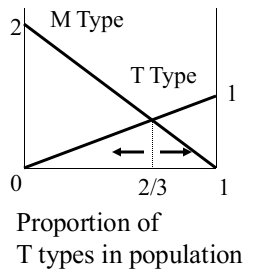

## Let us now consider a negotiation game

* Science faculty want a lab, Humanities want a theatre
* It is worse for both if there is an impasse
* Hard-liners fight, compromisers give in
* There are hard-liners and compromisers in each faculty (proportion $x$ of hardliners for science and $y$ for humanities)
* Rep is chosen from each faculty to negotiate

* Hard-liner scientist payoff is $y*0 + (1-y)*2$ while compromiser scientist payoff is $y*1+(1-y)*0$
* Better to send a hard-liner if $y < \frac{2}{3}$
* Similarly for humanist, better to send a hard-liner if $x<\frac{2}{3}$


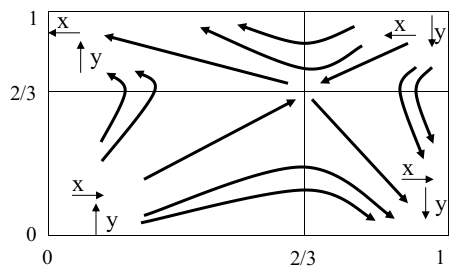